# Visualisation sous `Python` - *correction*

#### Analyse de Données Massives - Master 1ère année

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline


## A faire 



A partir du jeu de données `Computers` présent dans le module `pydataset`, vous devez répondre aux questions suivantes, avec `bokeh` et `seaborn`. Vous pourrez trouver des informations sur ce jeu de données en exécutant `data("Computers", show_doc = True)` dans le *notebook*.

In [2]:
ordis = pandas.read_csv("Computers.csv")
ordis.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


#### 1. Représenter graphiquement la variable `price` (histogramme, boîte à moustaches, ...)

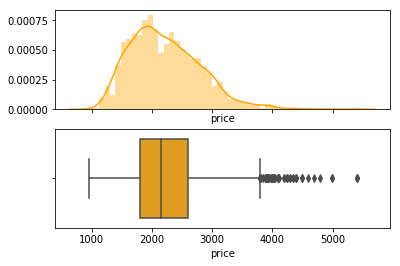

In [3]:
f, (p1, p2) = plt.subplots(2, sharex = True)
seaborn.distplot(ordis.price, ax = p1, color = "orange")
seaborn.boxplot(ordis.price, ax = p2, color = "orange")

#### 2. Représenter le lien entre la variable `price` et les variables

- `speed`
- `hd`
- `ram`
- `cd`
- `premium`
- `screen`

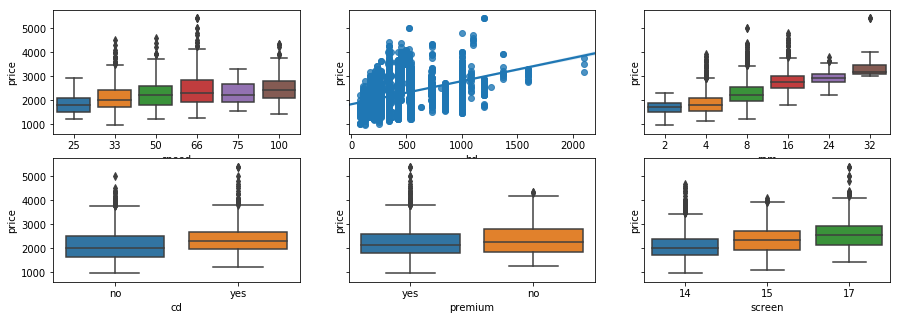

In [4]:
f, p = plt.subplots(2, 3, sharey = True, figsize = (15, 5))
seaborn.boxplot("speed", "price", data = ordis, ax = p[0, 0])
seaborn.regplot("hd", "price", data = ordis, ax = p[0, 1])
seaborn.boxplot("ram", "price", data = ordis, ax = p[0, 2])
seaborn.boxplot("cd", "price", data = ordis, ax = p[1, 0])
seaborn.boxplot("premium", "price", data = ordis, ax = p[1, 1])
seaborn.boxplot("screen", "price", data = ordis, ax = p[1, 2])

#### 3. Représenter sur `price` l'impact de ces couples de variables

- `speed` et `hd`

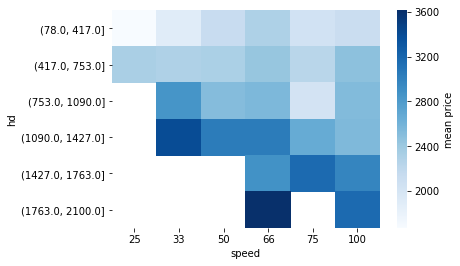

In [5]:
t = pandas.crosstab(pandas.cut(ordis.hd, 6, precision = 0), ordis.speed,
                    values = ordis.price, aggfunc = numpy.mean)
seaborn.heatmap(t, cmap = "Blues", cbar_kws = { 'label' : 'mean price' })

- `hd` et `screen`

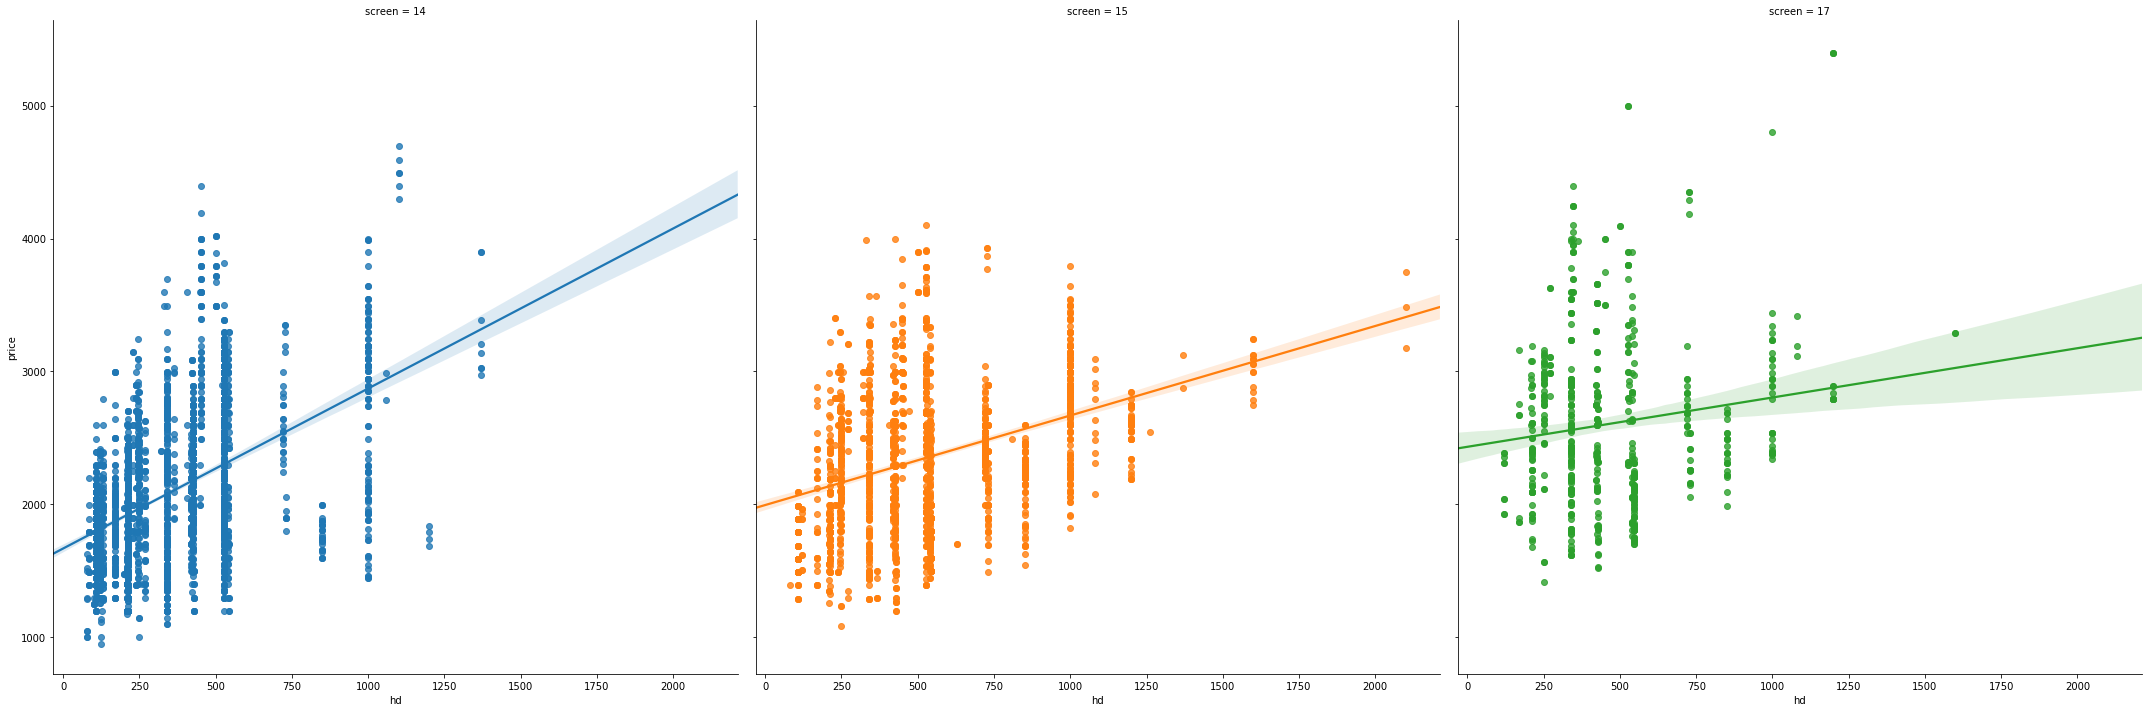

In [6]:
seaborn.lmplot("hd", "price", data = ordis, hue = "screen", 
               col = "screen", size = 10)

- `speed` et `premium`

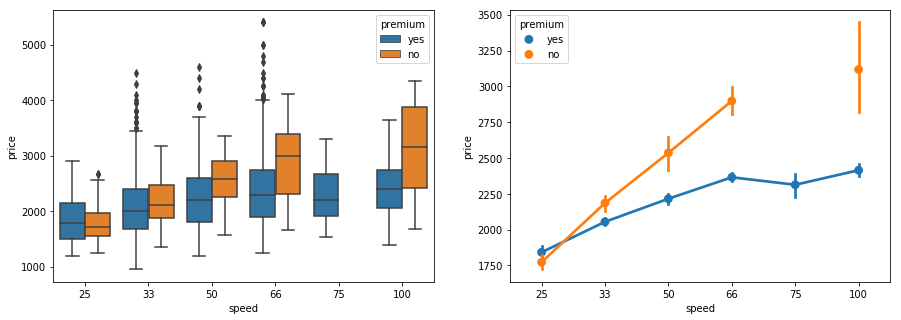

In [7]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

seaborn.pointplot("speed", "price", data = ordis, hue = "premium", ax =  ax2)
seaborn.boxplot("speed", "price", data = ordis, hue = "premium", ax = ax1)

- `hd` et `premium`

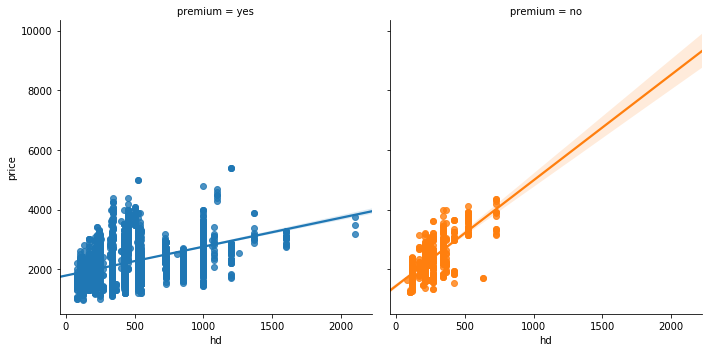

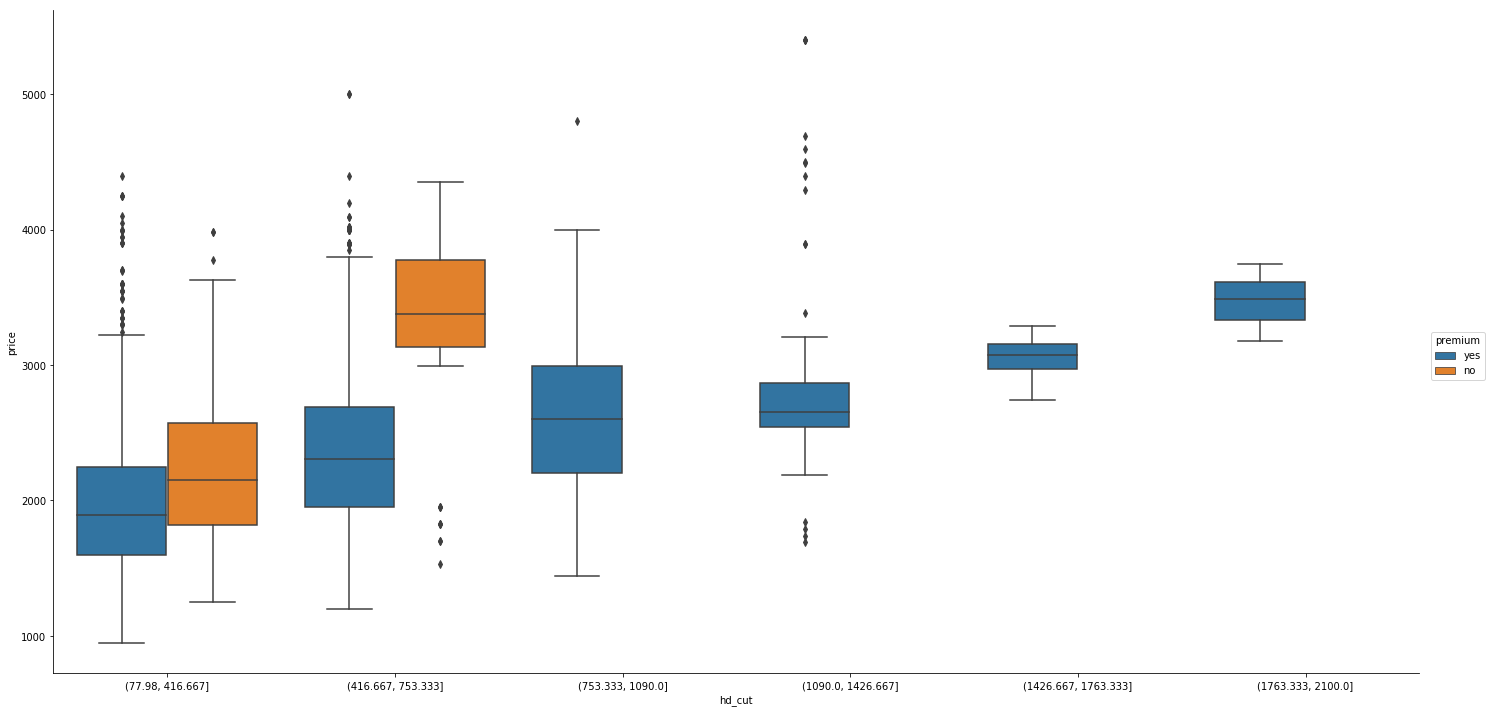

In [8]:
seaborn.lmplot("hd", "price", data = ordis, hue = "premium", 
               col = "premium", col_wrap = 2)

ordis2 = ordis.assign(hd_cut = pandas.cut(ordis.hd, 6))
seaborn.factorplot("hd_cut", "price", data = ordis2, hue = "premium", kind = "box", 
                   size = 10, aspect = 2)

#### 4. Proposer des représentations graphiques, toujours pour décrire `price` en fonction d'autres variables, mais prenant en compte plus de trois variables

In [9]:
# à vous de tester

### `anscombe`

Représenter sur un même graphique (avec un découpage donc) les quatre séries des données `anscombe`.

In [10]:
anscombe = pandas.read_csv("anscombe.csv")
anscombe

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


In [11]:
from functools import reduce
ans_bis = reduce(lambda a,b: pandas.concat([a, b]),
                 [pandas.DataFrame({"x": anscombe["x" + j], 
                                    "y": anscombe["y" + j], 
                                    "i": j}) 
                  for j in [str(i) for i in range(1, 5)]]).reset_index()
ans_bis.head()

,index,i,x,y
0,0,1,10,8.04
1,1,1,8,6.95
2,2,1,13,7.58
3,3,1,9,8.81
4,4,1,11,8.33


#### Avec `seaborn`

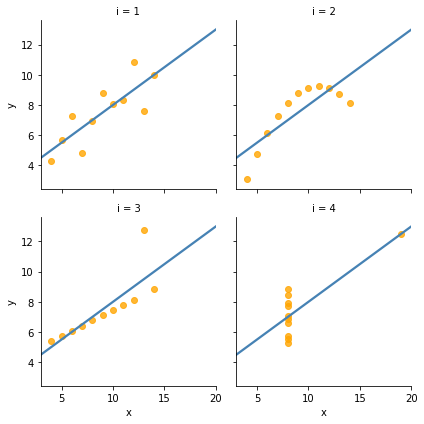

In [12]:
p = seaborn.FacetGrid(ans_bis, col = "i", col_wrap = 2)
p.set(xlim = (ans_bis.x.min() - 1, ans_bis.x.max() + 1))
p.map(seaborn.regplot, "x", "y", ci = False,
     scatter_kws = {"color": "orange"}, line_kws = {"color": "steelblue"})